In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk

In [30]:
df = pd.read_csv('Women Dresses Reviews Dataset .csv', encoding='utf8', sep=',', skipinitialspace=True) #reading the dataset

In [31]:
df.shape

(23486, 11)

In [32]:
df.columns

Index(['s.no', 'age', 'division_name', 'department_name', 'class_name',
       'clothing_id', 'title', 'review_text', 'alike_feedback_count', 'rating',
       'recommend_index '],
      dtype='object')

In [36]:
df.describe()

,s.no,age,clothing_id,alike_feedback_count,rating,recommend_index
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,11766.085647,43.260808,921.297274,2.652477,4.183145,0.818177
std,6775.710805,12.258122,200.227528,5.834285,1.112224,0.385708
min,0.000000,18.000000,1.000000,0.000000,1.000000,0.000000
25%,5887.250000,34.000000,861.000000,0.000000,4.000000,1.000000
50%,11779.500000,41.000000,936.000000,1.000000,5.000000,1.000000
75%,17640.750000,52.000000,1078.000000,3.000000,5.000000,1.000000
max,23484.000000,99.000000,1205.000000,122.000000,5.000000,1.000000


In [33]:
df.isnull().any()

s.no                    False
age                     False
division_name            True
department_name          True
class_name               True
clothing_id             False
title                    True
review_text              True
alike_feedback_count    False
rating                  False
recommend_index         False
dtype: bool

In [34]:
df = df.dropna()

In [35]:
df.shape

(19662, 11)

In [11]:
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [3]:
stop_words = nltk.corpus.stopwords.words('english')

In [13]:
df.groupby("recommend_index ").count()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating
recommend_index,,,,,,,,,,
0,3575,3575,3575,3575,3575,3575,3575,3575,3575,3575
1,16087,16087,16087,16087,16087,16087,16087,16087,16087,16087


In [14]:
# Sample DataFrame


# Mapping integers to strings
mapping = {1: 'YES', 0: 'NO'}

# Converting integers to strings using map
df['recommend_index '] = df['recommend_index '].map(mapping)

In [15]:
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,YES
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,YES
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,NO
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,YES
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,YES


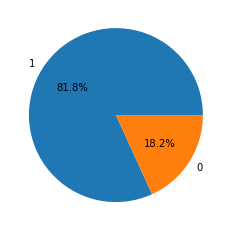

In [37]:
plt.pie(df['recommend_index '].value_counts().values,
        labels = df['recommend_index '].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [43]:
df

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23478,23478,26,General,Tops,Knits,883,I like the feel of the fabric but...,It feels soft and like a good quality. however...,0,3,0
23481,23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1


In [14]:
def preprocess_text(text):
    
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text

In [17]:
df['review_text'] = df['review_text'].apply(preprocess_text)
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,"[like, review, hesit, spend, much, pair, jean,...",0,5,YES
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,"[true, bunch, fall, cloth, photo, color, total...",12,5,YES
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"[want, skirt, work, love, design, way, way, lo...",3,1,NO
3,3,45,General Petite,Bottoms,Pants,1068,Wow,"[love, love, hesit, buy, first, review, made, ...",0,5,YES
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,"[absolut, love, retro, look, swimsuit, first, ...",0,5,YES


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['review_text'].map(''.join))

In [37]:
x = pd.DataFrame(x.toarray())
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30935,30936,30937,30938,30939,30940,30941,30942,30943,30944
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
#from imblearn import under_sampling, over_sampling

In [52]:
y = df['recommend_index ']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [61]:
model = MultinomialNB()

In [62]:
model.fit(x_train, y_train)

MultinomialNB()

In [63]:
y_pred = model.predict(x_test)

In [64]:
from sklearn import metrics 

In [65]:
acc = metrics.accuracy_score(y_test, y_pred)

In [66]:
cm  = metrics.confusion_matrix(y_test, y_pred)

In [67]:
cm

array([[  18,  722],
       [  89, 3104]], dtype=int64)

In [68]:
acc

0.7937960844139333

In [50]:
result = metrics.classification_report(y_test, y_pred)

In [51]:
result

'              precision    recall  f1-score   support\n\n          NO       0.19      0.92      0.31       720\n         YES       0.84      0.09      0.17      3213\n\n    accuracy                           0.25      3933\n   macro avg       0.51      0.51      0.24      3933\nweighted avg       0.72      0.25      0.20      3933\n'

# SENTIMENT ANALYSIS

In [7]:
df = pd.read_csv('Women Dresses Reviews Dataset .csv', encoding='utf8') #reading the dataset

In [5]:
df.shape

(23486, 11)

In [6]:
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [8]:
df['review_text'] = df['review_text'].astype(str)

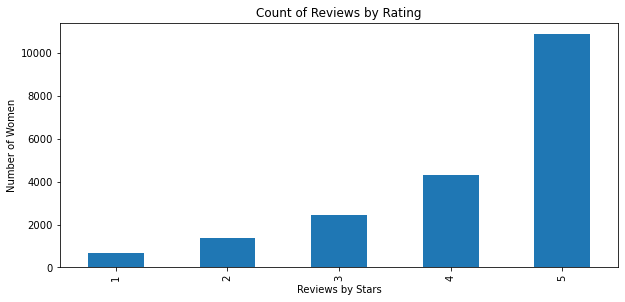

In [38]:
ax = df['rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Rating', figsize=(10, 4.5))
ax.set_xlabel('Reviews by Stars')
ax.set_ylabel('Number of Women')
plt.show()

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer 

In [10]:
sia = SentimentIntensityAnalyzer()

In [11]:
sia

In [12]:
df['compound'] = [sia.polarity_scores(review)['compound'] for review in df['review_text']]

df['neg'] = [sia.polarity_scores(review)['neg'] for review in df['review_text']]

df['neu'] = [sia.polarity_scores(review)['neu'] for review in df['review_text']]

df['pos'] = [sia.polarity_scores(review)['pos'] for review in df['review_text']]

In [12]:
df[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,0.709543,0.033601,0.740655,0.225740
std,0.389801,0.046928,0.124578,0.129077
min,-0.956200,0.000000,0.000000,0.000000
25%,0.659700,0.000000,0.673000,0.140000
50%,0.883100,0.017000,0.750000,0.212000
75%,0.948100,0.054000,0.818000,0.296000
max,0.995900,0.655000,1.000000,1.000000


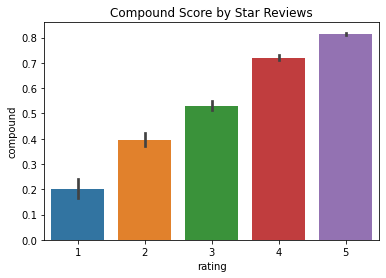

In [13]:
ax = sns.barplot(data=df, x='rating', y='compound')
ax.set_title('Compound Score by Star Reviews')
plt.show()

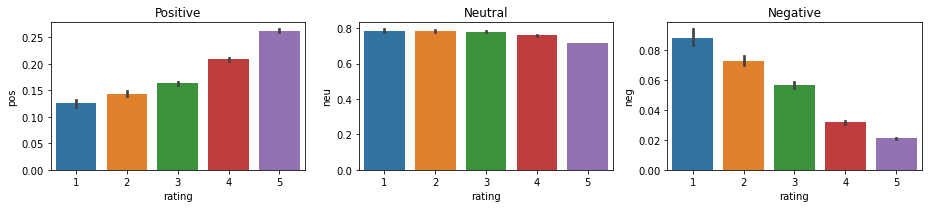

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))
sns.barplot(data=df, x='rating', y='pos', ax = axs[0])
sns.barplot(data=df, x='rating', y='neu', ax = axs[1])
sns.barplot(data=df, x='rating', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='compound', ylabel='Count'>

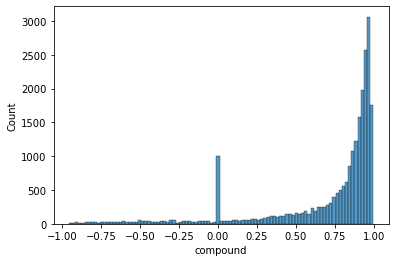

In [15]:
sns.histplot(df['compound'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

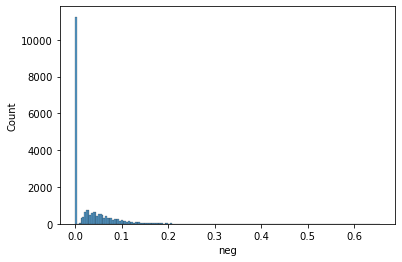

In [16]:
sns.histplot(df['neg'])

<AxesSubplot:xlabel='neu', ylabel='Count'>

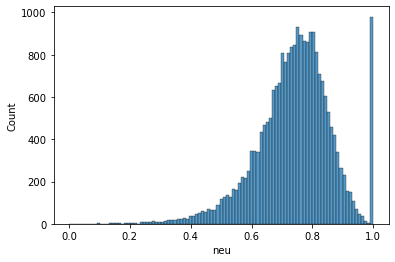

In [17]:
sns.histplot(df['neu'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

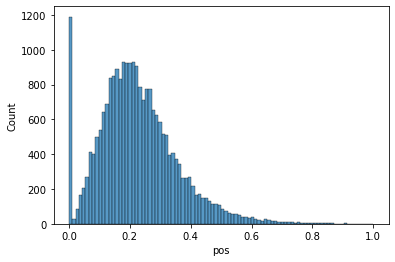

In [18]:
sns.histplot(df['pos'])

In [47]:
(df['compound']<=0).groupby(df['class_name']).sum()

class_name
Blouses           303
Casual bottoms      1
Chemises            0
Dresses           611
Fine gauge        111
Intimates          18
Jackets            64
Jeans             114
Knits             530
Layering           22
Legwear            15
Lounge             78
Outerwear          36
Pants             126
Shorts             34
Skirts             96
Sleep              32
Sweaters          163
Swim               45
Trend              19
Name: compound, dtype: int64

In [20]:
percentage_negative = pd.DataFrame((df['compound']<=0).groupby(df['class_name']).sum()
/df['class_name'].groupby(df['class_name']).count()*100,
columns=['% negative reviews']).sort_values(by='% negative reviews')

percentage_negative

,% negative reviews
class_name,
Chemises,0.000000
Pants,9.077810
Jackets,9.090909
Legwear,9.090909
Dresses,9.669251
Blouses,9.783662
Jeans,9.938971
Fine gauge,10.090909
Skirts,10.158730


In [27]:
df.query('rating==1').sort_values('compound', ascending=False)

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,compound,neg,neu,pos,processed_review
2490,2490,48,General Petite,Dresses,Dresses,1095,Fit was off,"I was really excited to get this dress, i init...",5,1,0,0.9885,0.000,0.690,0.310,"[realli, excit, get, dress, initi, order, smal..."
12716,12716,48,General Petite,Dresses,Dresses,1086,Too sheer,The dress is beautiful on the model. in person...,0,1,0,0.9844,0.000,0.750,0.250,"[dress, beauti, model, person, sheer, could, d..."
437,437,44,General,Tops,Knits,868,Cute top but looks like a tent (i'm not kidding),I love baseball style tees and when i saw the ...,21,1,0,0.9814,0.020,0.684,0.296,"[love, basebal, style, tee, saw, homebas, tee,..."
11313,11313,35,General,Bottoms,Jeans,1037,Fell apart after 3 wearings,"I loved these pants the minute i put them on, ...",1,1,0,0.9802,0.026,0.711,0.264,"[love, pant, minut, put, happi, i'd, order, wo..."
1023,1023,39,General,Dresses,Dresses,1110,Such a disappointment!,I fell in love with this dress but when i rece...,2,1,0,0.9787,0.000,0.759,0.241,"[fell, love, dress, receiv, mail, realli, surp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19554,19554,38,General Petite,Dresses,Dresses,1078,Not worth the effort,"Generally, i find sizing at retailer to be ver...",0,1,0,-0.9333,0.157,0.843,0.000,"[gener, find, size, retail, consist, order, dr..."
3490,3490,32,General Petite,Dresses,Dresses,1078,Literally unwearable.,I purchased this in-store in a vivid red color...,6,1,0,-0.9365,0.196,0.744,0.060,"[purchas, store, vivid, red, color, tri, got, ..."
4970,4970,35,General,Tops,Knits,876,"Too boxy, sizing down - not good!",I read the other review that said the shirt wa...,6,1,0,-0.9411,0.277,0.659,0.064,"[read, review, said, shirt, boxi, think, would..."
12318,12318,48,General,Jackets,Jackets,974,Fabric is poor quality,I purchased this jacket in my local store. siz...,4,1,0,-0.9474,0.184,0.763,0.054,"[purchas, jacket, local, store, size, 10, run,..."


In [32]:
data = df
df = pd.DataFrame(data)

# Count occurrences of each value in the column
value_counts = df['class_name'].value_counts()

# Sort values by their occurrence count
sorted_values = value_counts.sort_values(ascending=False)

print(sorted_values)

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: class_name, dtype: int64


In [15]:
df['processed_review'] = df['review_text'].apply(preprocess_text)

reviews_positive_subset = df.loc[(df['class_name'] == 'Dresses' ) & (df['compound']>0), :]

reviews_negative_subset = df.loc[(df['class_name'] == 'Dresses' ) & (df['compound']<0), :]

reviews_positive_subset.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,compound,neg,neu,pos,processed_review
17,17,50,General Petite,Dresses,Dresses,1078,Great with leggings,This dress is too short for me to wear as a dr...,13,4,1,0.9098,0.024,0.819,0.157,"[dress, short, wear, dress, 5'7, 40, howev, gr..."
25,25,72,General,Dresses,Dresses,1094,Perfect for irish fest and beyond!,I bought this dress for its green color and fl...,0,5,1,0.7936,0.057,0.789,0.153,"[bought, dress, green, color, flowi, design, w..."
26,26,49,General Petite,Dresses,Dresses,1078,Tent-like but cozy,I tried this on in the store and it fit like a...,4,3,0,0.9375,0.021,0.813,0.165,"[tri, store, fit, like, tent, help, i'm, 5'1, ..."
36,36,35,General,Dresses,Dresses,1083,Spring for this dress now!,"Simply put, this dress will make you feel like...",0,5,1,0.9635,0.020,0.756,0.223,"[simpli, put, dress, make, feel, like, joan, m..."
42,42,46,General,Dresses,Dresses,1094,Darla tulle dress,Very pretty. runs true to size. waist is highe...,2,4,1,0.8381,0.035,0.767,0.198,"[pretti, run, true, size, waist, higher, photo..."


In [16]:
neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

In [17]:
wc = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

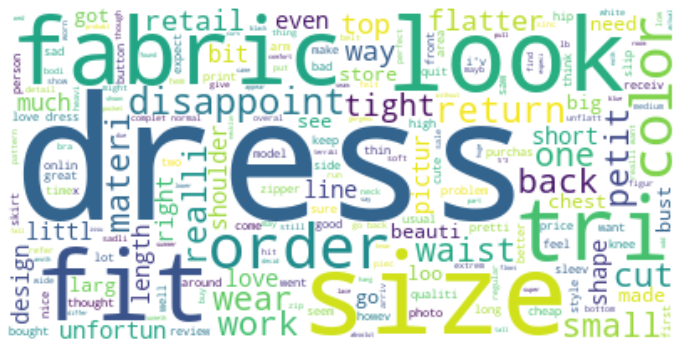

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wc = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

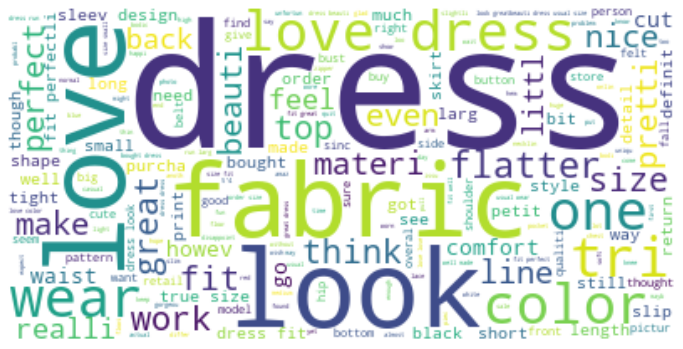

In [21]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

 dress    fit   size   love   look   wear   like    i'm  color fabric 
  9736   3329   3003   2992   2363   2141   1999   1793   1649   1554 


In [23]:
neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

 dress   size   look    fit   like fabric    tri  order  would    i'm 
   630    181    164    147    132    122    108    107    107     96 


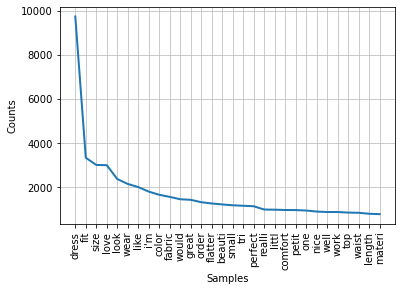

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
pos_freqdist.plot(30)

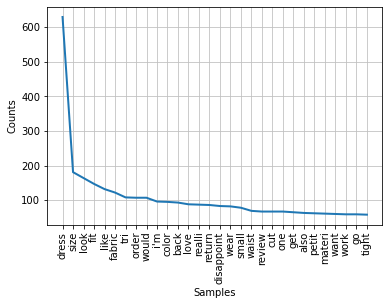

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
neg_freqdist.plot(30)